# Technical note about origins of Fano lineshapes and difficulty of extracting internal quality factors

## Introduction 

In this technical note, we will explore some aspects of microwave measurement setups that can lead to asymmetric "Fano" lineshapes. 

This topic has been covered already quite extensively in the literature, with many papers offering solutions and fitting functions for extracting internal quality factors from asymmetric lineshapes starting from various initial assumptions. A non-exhaustive list of studies of asymmetric lineshapes is included here:

Superconducting Resonators with Parasitic Electromagnetic Environments <br>
J. M. Hornibrook, E. E. Mitchell, D. J. Reilly <br>
https://arxiv.org/abs/1203.4442

Efficient and robust analysis of complex scattering data under noise in microwave resonators <br>
S. Probst, F. B. Song, P. A. Bushev, A. V. Ustinov, M. Weides <br>
https://arxiv.org/abs/1410.3365

An analysis method for transmission measurements of superconducting resonators with applications to quantum-regime dielectric-loss measurements <br>
Chunqing Deng, Martin Otto, Adrian Lupascu <br>
https://arxiv.org/abs/1304.4533

An analysis method for asymmetric resonator transmission applied to superconducting devices <br>
M. S. Khalil, M. J. A. Stoutimore, F. C. Wellstood, K. D. Osborn <br>
https://arxiv.org/abs/1108.3117

The above references claim that it is possible to extract the internal quality factor of a resonator that displays an asymmetric line shape by fitting the appropriate function to the measured data.

Here, we revisit a common origin of asymmetric resonance lineshapes: interference of the signal from the resonator with a parallel path, also related to the original origin of the Fano lineshapes observed in atomic physics:

https://en.wikipedia.org/wiki/Fano_resonance

We will illustrate how coherent interference with a "parasitic" cross-talk signal can lead to asymmetric lineshapes. We also show that while we are are able create a function that fits the data nicely, there are too many free parameters to be able to extract the internal quality factor without systematic error. 

## Resonance response functions in ideal case

We will first consider the case of ideal S21 parameters of a resonance. We will consider three cases:

1. A reflection cavity with input coupling rate $\kappa_1$ with reflection coefficient denoted $S_{11r}$
2. A transmission "side coupled" cavity with input coupling rate $\kappa_1$ with transmission coefficient denoted $S_{21s}$
3. A transmission "end coupled" cavity with input / output coupling rates $\kappa_1$ and $\kappa_2$ with transmission coefficient denoted $S_{21e}$

The internal loss rate and total loss rate for all three cases will be denoted by $\kappa_i$ and $\kappa$, respectively. The detuning of the probe frequency from the resonance frequency will be denoted as $\Delta$. The total external coupling rate $\kappa_e$ will be defined as the sum of all coupling rates to external posts: 

$$
\kappa_{e} = \sum_n \kappa_n 
$$

The total cavity loss rate is given by the sum of $\kappa_e$ and $\kappa_i$:

$$
\kappa = \kappa_e + \kappa_i
$$


It is also useful to define the coupling efficiency

$$
\eta = \frac{\kappa_{e}}{\kappa}
$$



With these definitions, the S-parameters we will consider are then given by:

$$
S_{11r}(\Delta) = 1 - \frac{2\eta}{1 + 2i\Delta/\kappa}
$$

$$
S_{21s}(\Delta) = 1 - \frac{\eta}{1 + 2i\Delta/\kappa}
$$

$$
S_{21e}(\Delta) = \frac{\eta}{1 + 2i\Delta/\kappa}
$$



including loss out all of the ports. 

*(Note that typically, in the two-port end-coupled cavity case, one designs a very weak coupling efficiency for the input port and a high coupling efficiency on the output port which is connected to the amplifier, so that any intracavity signal goes maximally to the amplifier. However, the external scattering rates do not depend on which one is large, and are of course symmetric: $S_{21} = S_{12}$, even for the case of $\kappa_1 \neq \kappa_2$)*

Let's take a look at these one by one in the ideal case. We will start with $S_{21S}$. We will plot in units of $\Delta / \kappa$. First, let's define some functions:

In [79]:
import matplotlib.pyplot as plt
import numpy as np

delta = np.linspace(-5,5,500)

def S11r(delta, eta):
    return 1+0j - 2*eta/(1+2*1j*delta)

def S21s(delta, eta):
    return 1+0j -eta/(1+2*1j*delta)

def S21e(delta, eta):
    return eta/(1+2*1j*delta)

The hidden code cell here contains a plotting function we will use to generate plots:

In [75]:
def make_plots(function_name):
    func = eval(function_name)
    fig = plt.figure(constrained_layout=True, figsize=(14,4))
    gs = fig.add_gridspec(2, 3)
    etas = (0.2,0.5,0.9)
    ax = fig.add_subplot(gs[0,0])
    for eta in etas:    
        ax.plot(delta, np.abs(func(delta, eta)), label="$\eta = %.1f$" % eta)
    ax.legend()
    ax.set_ylabel("|%s|"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    ax = fig.add_subplot(gs[1,0])
    for eta in etas:    
        ax.plot(delta, np.unwrap(np.angle(func(delta, eta)))/np.pi*180)
    ax.set_ylabel("Phase(%s)"%function_name)
    ax.set_xlabel("$\delta/\kappa$")
    plt.axhline(0,ls=":",c='grey')  
    ax = fig.add_subplot(gs[:,1])
    plt.axhline(-1,ls=":",c='grey')   
    plt.axhline(0,ls=":",c='grey')    
    plt.axhline(1,ls=":",c='grey')    
    plt.axvline(-1,ls=":",c='grey')   
    plt.axvline(0,ls=":",c='grey')    
    plt.axvline(1,ls=":",c='grey')    
    for eta in etas:    
        ax.plot(np.real(func(delta,eta)), np.imag(func(delta,eta)))
    ax.set_xlabel("Re(%s)"%function_name)
    ax.set_ylabel("Im(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey') 
    t = np.linspace(0,2*np.pi,100)
    ax.plot(np.cos(t), np.sin(t), ls="--", c="grey")
    ax = fig.add_subplot(gs[0,2])
    for eta in etas:    
        ax.plot(delta, np.real(func(delta, eta)))
    ax.set_ylabel("Re(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    plt.axhline(-1,ls=":",c='grey')
    ax = fig.add_subplot(gs[1,2])
    for eta in etas:    
        ax.plot(delta, np.imag(func(delta, eta)))
    ax.set_ylabel("Im(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    plt.axhline(-1,ls=":",c='grey')
    ax.set_xlabel("$\delta/\kappa$")

### Reflection cavity $S_{11r}$

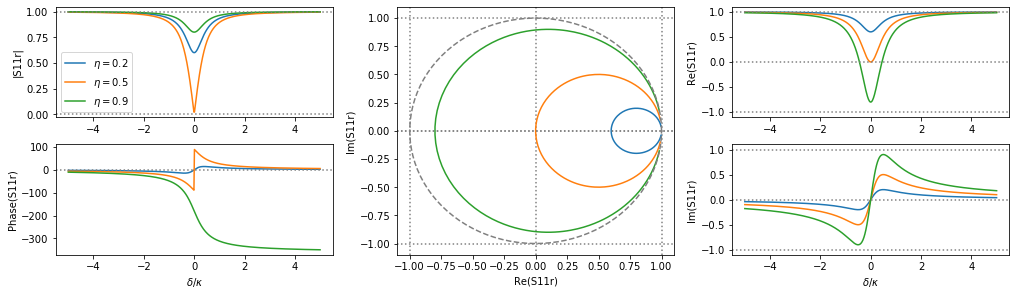

In [76]:
make_plots("S11r")

Note that for the reflection case, it is not possible to tell if you are undercoupled or overcoupled by looking at only $|S_{11r}$, you also need to know if the phase undergoes a $2\pi$ shift or not. This can be seem more clearly in the polar plot in the middle: as you sweep through the resonance, the polar plot sweeps out a circle counter clockwise, starting from the position (1,0). If this circle does not enclose the origin, then the resonator is undercoupled, whereas if it does enclose the origin, it is not overcoupled. Precisely at critical coupling point (orange curve), the circle touches the origin exactly and the phase is not well defined. 

Note that if we look at only real part $\Re(S_{11})$, the plot in the upper right corner, it is relatively easy to to see the resonator is under or overcoupled: if undercoupled, $\Re(S_{11r})$ is always positive. At critical coupling, it reaches zero at resonance. And for overcoupled, it crosses zero and becomes negative. The value of real part for $\Delta = 0$ has a simple relation to the internal loss rate:

$$
S_{11r}(\Delta = 0) = 1 - 2\eta
$$

which can be rewritten to give:

$$
\kappa_i = \left( \frac{1 + S_{11r}(0)}{2} \right) \kappa
$$

The total linewidth $\kappa$ can be determined independently from the full-width-half-max (FWHM) of either $\Re(S_{11r})$ or $|S_{11r}|^2$. Combining this with the value of $S_{11r}(\Delta = 0)$ then determines the internal loss rate $\kappa_i$. 

Note that at resonance, $S_{11r}$ is purely real-valued, and so $S_{11r} = \Re(S_{11r})$

### Side-coupled transmission cavity $S_{21s}$

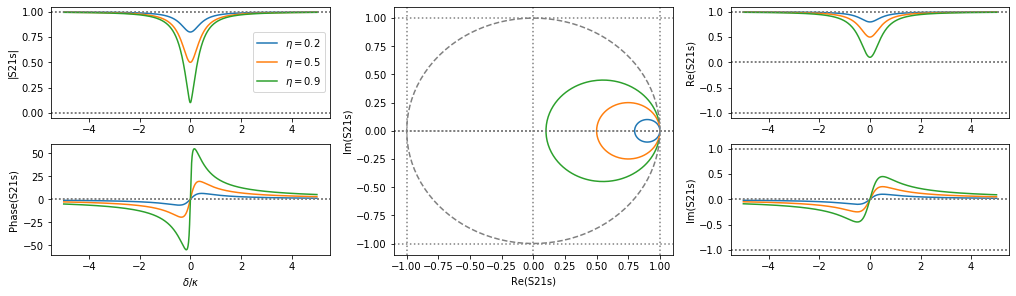

In [63]:
make_plots("S21s")

Note that $S_{21s}$, although showing a similar dip as for the reflection case, has a different behaviour: the circle in the polar plot never encloses the origin, and $|S_{21s}|$ only asymptotically zero for the case of infinite overcoupling. 

Similar to the reflection case, we can also work out a simple formula for the internal loss rate based on  $S_{21s}(0)$: 

$$
S_{21s}(0) = 1 - \eta 
$$

which gives a very simple relation:

$$
\kappa_i = S_{21s}(0)\ \kappa
$$

Similar to above, $\kappa$ is obtained from the FWHM of the $\Re(S_{21s})$ or $|S_{21s}|^2$. Note that this since $S_{21s}(0)$ is real-valued, the value of $\kappa_i$ obtained from this formula is also real-valued.

### End-coupled transmission cavity $S_{21e}$

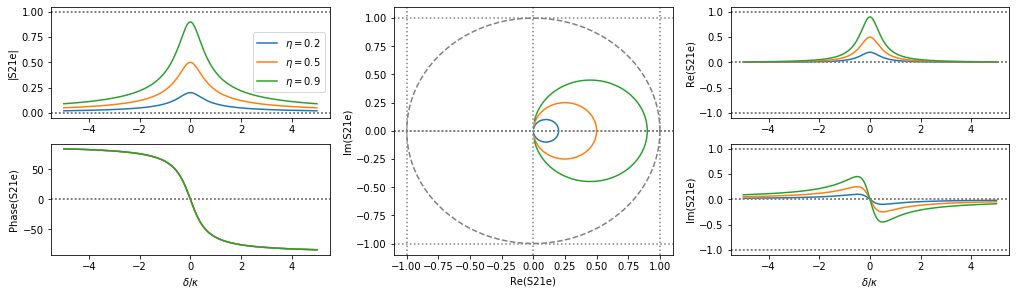

In [71]:
make_plots("S21e")

Again, here similar, but the "circle" starts from zero and not from the unit circle. 

The transmission on resonance is given by: 

$$
S_{21e}(0) = \eta
$$

which gives:

$$
\kappa_i = \big( 1 - S_{21e}(0) \big)\ \kappa
$$

### Experimental considerations in "ideal" case

Even in the ideal cases discussed above, in which the lineshapes are all symmetric, there are typically experimental considerations in cryogenic setups that complicate the analysis. 


#### Running phase

First, the resonantor is not directly connected to your VNA, but instead by long cables. If nothing else, these cables introduce a frequency dependent phase shift $\phi =  \omega t$, where $t$ is the propagation delay for frequency $\omega$ in the cable. For a simple cable (with no dispersion and no cable resonances), this time delay would be given by $t = L / v$, where $L$ is the length  of the cable and $v$ is the propagation (group) velocity in the cable. 

Since in the simplest case this is a linear function  of frequency, it results in a phase which has a slope, and, depending on how it is calculated, will also wrap every time it crosses $2 \pi$. For this reason, it is often referred to as the "running phase". In practice, a constant linear phase is very easy to correct for, either in software afterwards, or often by adjusting the "electrical length" setting of the VNA (in which case, the VNA will perform the software correction for you). 

#### The value of "1" (normalisation)

The bigger problem in experimental setups is that there is typically a large and unknown amount of loss / gain in the signal path to and from the device. 

There are many sources of attenuation, both intentional and unintentional. All of the cables we typically use have at least a few dB of attenuation, and for the cryogenic cables, this is likely temperature dependent, changing by a dB or so maybe. We also have large intentional attenuation (on the order of 50 dB) in order to remove the room-temperature thermal noise from our signals. 

In addition, there are then cables coming back out of the fridge, with often circulators, isolators, low noise high-gain amplifiers (often in chains of two or three). 

Furthermore, the cables are broken at many places for thermalisation, with SMA attenuators, SMA connectors. The non-perfect impedance matching of all these components typically leads to "cable resonances": the transmission  as a function of frequency is not flat, and will typically involve oscillations of a few dB (1-2 dB optimistically, maybe 3-4 dB for a less well matched setup). This means that even if you know all of the attenuations really well, it will be very difficult to predict the exact value of unity transmission for a given frequency on a given cooldown. 

The upshot of all of this is that it is very difficult for us to independently determine the transmission between our VNA and the ports of our device to within a few dB (factor of 2 or 3). Therefore, we need an experimental way to determine the value of $S_{21}$ as seen by the VNA that we should consider to correspond to "unity" at the output port of the device. 

In this respect, the use of the reflection geometry or side-coupled geometry offers a distinct advantage: by measuring the S-parameter away from resonance, one in principle obtains a direct calibration of the value of device-referenced unity transmission. 

*(Note a small foreshadowing of a problem we will encounter soon: this calibration of unity does also assume that the value of zero does not need to be calibrated. If the only influence of the experimental setup is to add an unknown attenuation and unknown phase, then this would seem to be a good assumption, since the would not alter the value or zero. However, if there is parasitic crosstalk in the setup, the assumption that zero is zero may no longer hold...)*

## Fano resonance as a result of crosstalk

In real experimental conditions, in  addition  to  scaling  and  phase shifts from  the cables and wiring in  the measurement setup, there is also the possibility of "cross talk" between the input and output of your measurement: some of the input signal you send in bypasses your device and is added back to the signal coming out of your device. 

This crosstalk could come from many sources:

* Cable reflections in a reflection measurement along any part of the path where the incoming and outgoing signals travel in the same cable (ie. in a typical cryogenic measurement, between your device and the circulator / directional coupler you use to get the reflected signal). 


* Direct leakage from the input to the output port of your circulator / directional coupler when doing a reflection measurement. For a circulator, this given by the isolation parameter, typically -17 dB. For a directional coupltr, this leaking is given  by the "directivity", typically something like -60 dB. 


* Parallel-path cross talk from port 1 to port 2 in a side-coupled or end-coupled configuration. This parallel path could be via slot-modes in the transmission lines on chip, box modes of the microwave box that the chip is enclosed in. We have also seen evidence of cross talk via slot-line modes running around the edge of the chip, even with heavy wire bonding to the ground. 

The influence of all these types of cross talk is that a small fraction of the incoming power is split off, given a phase shift, and recombined with the outgoing signal from the cavity. Denoting the fraction of the power that is split as $r^2$ such that the voltage ratio of the reflected wave is $r$, and the phase lag it acquires relative to that of the signal from the cavity as $\phi$. We then have a modified S-parameter $S_m$ as measured by the experimental apparatus:

$$
S_{m} = A(r e^{i\phi} + (1-r)S)
$$

Here, we will choose the normalization constant $A$ such that $|S_m| = 1$ outside of the resonance linewidth, a common choice of normalization when working with experimental data.  

In [115]:
def Sm(S, phi, r):
    A = 1/np.abs(1-r+r*np.exp(1j*phi))
    return A*(r*np.exp(1j*phi) + (1-r)*S)

In [116]:

def make_plots2():
    func = eval(function_name)
    fig = plt.figure(constrained_layout=True, figsize=(14,4))
    gs = fig.add_gridspec(2, 3)
    etas = (0.2,0.5,0.9)
    #  Magnitude
    ax = fig.add_subplot(gs[0,0])
    y0 =  func(delta,eta)
    y1 =  Sm(y0, phi, r)
    l0 = "No crosstalk"
    l1 = "r = %.1f, $\phi$ = %.f $\pi$" % (r,phi)
    ax.plot(delta, np.abs(y0), label=l0)
    ax.plot(delta, np.abs(y1), label=l1)
    ax.legend()
    ax.set_ylabel("|%s|"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    # Phase
    ax = fig.add_subplot(gs[1,0])
    ax.plot(delta, np.unwrap(np.angle(y0))/np.pi*180)
    ax.plot(delta, np.unwrap(np.angle(y1))/np.pi*180)
    ax.set_ylabel("Phase(%s)"%function_name)
    ax.set_xlabel("$\delta/\kappa$")
    plt.axhline(0,ls=":",c='grey') 
    # Polar
    ax = fig.add_subplot(gs[:,1])
    plt.axhline(-1,ls=":",c='grey')   
    plt.axhline(0,ls=":",c='grey')    
    plt.axhline(1,ls=":",c='grey')    
    plt.axvline(-1,ls=":",c='grey')   
    plt.axvline(0,ls=":",c='grey')    
    plt.axvline(1,ls=":",c='grey')    
    ax.plot(np.real(y0), np.imag(y0))
    ax.plot(np.real(y1), np.imag(y1))
    ax.set_xlabel("Re(%s)"%function_name)
    ax.set_ylabel("Im(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey') 
    t = np.linspace(0,2*np.pi,100)
    ax.plot(np.cos(t), np.sin(t), ls="--", c="grey")
    # Real part
    ax = fig.add_subplot(gs[0,2])
    ax.plot(delta, np.real(y0))
    ax.plot(delta, np.real(y1))
    ax.set_ylabel("Re(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    plt.axhline(-1,ls=":",c='grey')
    # Imaginary part
    ax = fig.add_subplot(gs[1,2])
    ax.plot(delta, np.imag(y0))
    ax.plot(delta, np.imag(y1))
    ax.set_ylabel("Im(%s)"%function_name)
    plt.axhline(0,ls=":",c='grey')
    plt.axhline(1,ls=":",c='grey')
    plt.axhline(-1,ls=":",c='grey')
    ax.set_xlabel("$\delta/\kappa$")

### Crosstalk for $\phi = \pi/2$

Let us first examine the case of $\phi = \pi/2$ with r = 0.1 (about 1 dB) for $\eta = 0.2$ (undercoupled) for a reflection measurement:

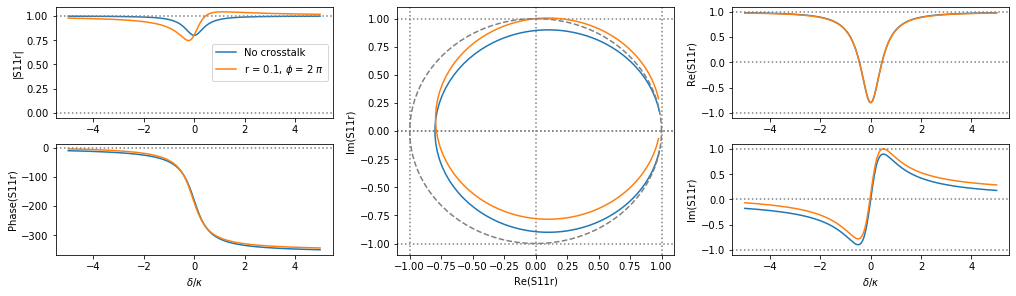

In [125]:
phi = np.pi/2
r = 0.1
eta = 0.9
function_name = "S11r"

make_plots2()

There are a couple of things to note: first, the choice of a phase of $phi = \pi/2$ for the cross talk signal does indeed produce the asymmetric lineshape in $|S_{11r}|$ associated with typical "Fano" resonances. Second, if one looks carefully, one can see that with this choice of noramlisation, $|S_{11r}|$ exceeds 1. Note that this is purely due to our choice of normalisation: the device is not not producing power gain.

More intuition into what is going on can be obtained by looking at the polar plot. Here, the effect of the cross talk is easy to predict: the presence of a crosstalk signal with a phase of $\phi = \pi/2$ is simply to shift the resonance circle upwards. By tracing a counterclockwise arc around the orange circle from the origin, one can also see the reason for the asymmetry in the magnitude of the S-parameter: the distance from the origin to the orange circle is smaller on the bottom side, and larger on the top side. 

Furthermore, the reason why $|S_{11r}|$ exceeds 1 is also no longer surprising in the polar plot: the upwards shifted orange curve is now shifted vertically outside of the unit circle (dashed grey line). This effect is less pronounced for the case of an undercoupled cavity in which the initial resonance circle is much smaller in diameter. In this case, a much larger value of $r$ is required for $|S_{11r}|$ to exceed 1. 

The vertical shift of the circle is also easy to see in the plots of the real and imaginary quadratures. For the choice of $\phi = \pi/2$, the real quadrature is completely unaffected (which makes sense, since the shift is only in vertical direction in the polar plot). 

Note also that even though the magnitude resonance shows a strongly asymmetric shape, the real quadrature is still perfectly Lorentzian, and fitting this Lorentzian allows one to easily extract the total linewidth $\kappa$ without requiring any advanced fitting functions (or, even by eye, but estimating the FWHM). 

Furthermore, as discussed above, we can extract $\kappa_i$ purely from the values of $\Re(S_{11r})$. Since the real quadrature is unaffected by the crosstalk for $\phi = \pi/2$, we can also apply the same simple method as above to extract the internal loss rates. 

To summarize the case of crosstalk with $\phi = \pi/2$:

* The crosstalk produces an asymmetric lineshape of $|S_{11r}|$
* The real quadrature $\Re(S_{11r})$ is unaffected and can be used to extract $\kappa$ and $\kappa_i$ with no systematic errors using a simple Lorentzian fit


### Crosstalk for $\phi = 0$

Let us first examine the case of $\phi = \pi/2$, again with r = 0.1 (about 1 dB) for $\eta = 0.2$ (undercoupled) for a reflection measurement.

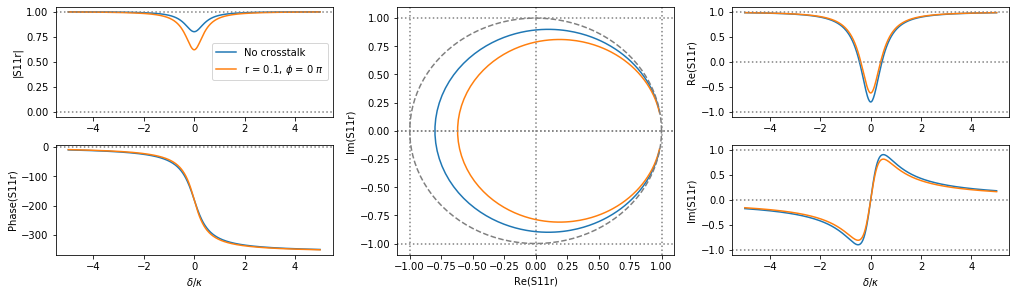

In [126]:
phi = 0
r = 0.1
eta = 0.9
function_name = "S11r"

make_plots2()

On first sight, it would seem that $\phi = 0$ is much less detrimental to our lineshape: $|S_{11r}$ still looks nice and symmetric, no signature at all of any Fano lineshape. 

However, if you look carefully, this initial apparent innocence is actually a very serious problem! This becomes clear when you look at the polar plot. In the polar plot, it appears as if with the crosstalk, the circle has shrunk in diameter. This is a big problem. Why? In these measurements, the diameter of this circle relative to the unit circle is what determines what we extract from the data as an internal loss rate (quality factor). Since the diameter has changed, this means that the crosstalk has modified what we think the internal quality factor is of the cavity!

Why is crosstalk with a phase of $\phi=0$ so dangerous? The problem is that this produces a *horizontal* shift of our unit circle: in the case above, we would shift the blue circle to the right. However, in experiments, we need to have a way of calibrating the value of unity reflection (or transmission for side-coupled cases), and for this, we use the off-resonant value $|S_{11}|$ to rescale our measurements: effectively, finding the unit circle by assuming that our measured circle touches it at zero-angle in the plane above. However, if we shift the circle sideways due to crosstalk, find a unit circle based on the horizontally shifted curve, and renormalize based on that, the resulting circle will be smaller in diameter like the orange one!

This can also be seen even more easily in the plot of the real quadrature. With $\phi=0$, the cross talk causes an upwards or downwards shift of this curve. But, our normalisation procedure rescales this curve so that away from resonance it becomes unity. But if we first offset it by an unknown amount, and then rescale it, this shifts the minimum of the curve by an unknown amount. Since this minimum determines the value of $\kappa_i$ that we extract, crosstalk with $\phi = 0$  causes us to lose all information about the value of the internal loss rate.

To summarize the case of crosstalk with $\phi = 0$:

* Crosstalk with $\phi = 0$ is dangerous since, unlike $\phi = \pi/2$, it does  not produce any recognizable artifacts in your measurement
* It does however change the value of $\kappa_i$ you extract, and it is impossible to detect

### Other cavity configurations

The various cases of crosstalk values and angles can also be analyzed for other cavity configurations, resulting in similar effects which can be analyzed with the formulas above.

# Conclusions and Consequences 

What are the consequences of the above analysis? 

The first important message is that asymmetric lineshapes ("Fano effects") arise from crosstalk signals that produce an offset in the imaginary quadrature of the measured cavity response. The asymmetric lineshape on it's own is not harmful: in fact, crosstalk of the imaginary quadrature is harmless, and if one analyses the S-parameter data in terms of real and imaginary quadratures, the analysis is completely unaffected by the crosstalk, despite the fact that it results in asymmetric lineshapes for the magnitude of the S-parameter. 

A second more important consquence is that leakage of the *real* quadrature does not cause any asymmetric lineshape, but *does* result in an unknown systematic error in the calculated internal quality factor that *cannot* be calibrated out from any measurement. The conclusion one can draw from this problem is that **without an independent estimation or calibration of the crosstalk in a given measurement configuration, one cannot establish the magnitude of the systematic error in  the extraction of an internal quality factor.**

What is the practical relevance of these two consequences? First, a survey literature of superconducting cavity measurements firmly establishes that crosstalk can be a problem in a large number of experimental setups by looking at the prevalence of asymmetric lineshapes in the magnitude of S-parameters. If there is cross talk, either in the setup, in the microwave box, or on the chip itself, and we don't know how big it is for a specific measurement, we cannot trust the values of the internal loss rates (quality factors) extracted as they could be subject to unknown systematic error, even for the case that there is not indication of an asymmetric lineshape in a given  measurement.

A good follow up for this work is a study of how the large the systematic errors could be for a given value of cross talk, and if this is sensitive to the value of $\eta$ of the cavity design.

